# Utilizing ggplot2 for Data Visualization.

Discover the art of data visualization with ggplot2 in this hands-on course. "Utilizing ggplot2 for Data Visualization" empowers participants to transform raw data into meaningful visual representations. Through practical examples and step-by-step tutorials, learners will explore ggplot2's grammar of graphics, mastering techniques to design eye-catching plots, histograms, bar charts, and more. By the end of the course, attendees will be adept at conveying complex insights through beautiful and engaging visualizations.

# ggplot2 Basics and qplot()

The ggplot2 package operates on the concept that every plot comprises fundamental components: data, a coordinate system, and a visual representation. With ggplot2, you construct plots incrementally, beginning with the data and coordinates, and then specifying graphical elements such as lines, points, bars, colors, etc.

In ggplot2, there are two plotting functions: qplot() (quick plot) and ggplot() (grammar of graphics plot). While qplot() resembles the base R plot() function, as it requires a single function call and can create various plot types, it does have some limitations in terms of flexibility compared to ggplot().

As mastering the ggplot() syntax is fundamental to utilizing the full potential of the package, we won't spend much time on qplot(). Instead, we'll briefly look at one qplot example for illustration purposes and then proceed to focus on ggplot().

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


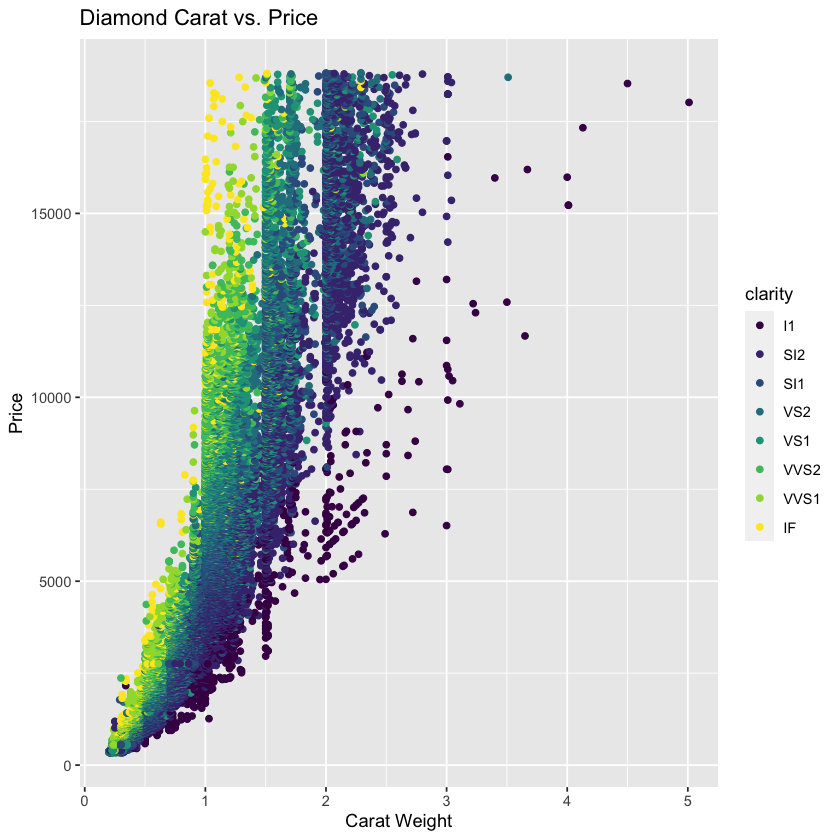

In [1]:
library(ggplot2)

qplot(x = carat,                            # x variable
      y = price,                            # y variable
      data = diamonds,                      # Data set
      geom = "point",                       # Plot type
      color = clarity,                      # Color points by variable clarity
      xlab = "Carat Weight",                # x label
      ylab = "Price",                       # y label
      main = "Diamond Carat vs. Price");    # Title

# Using ggplot()

Plots in ggplot are constructed layer by layer using the ggplot() function. Every ggplot begins with a common basic syntax, commencing with a call to ggplot() and specifying the data set to be utilized. Additionally, aesthetic mappings are defined, linking variables in the data set to visual attributes of the plot, such as the x and y position.

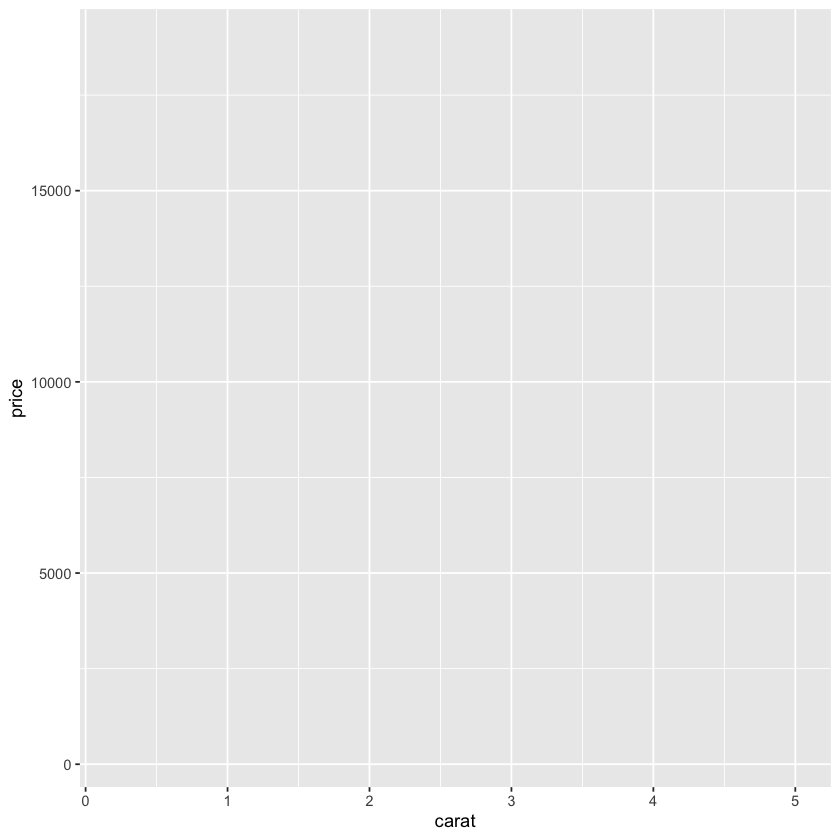

In [2]:
ggplot(data=diamonds,             # call to ggplot() and data frame to work with
       aes(x=carat, y=price))     # aesthetics to assign

In the given code, we begin by specifying the dataset we want to use and then proceed to assign the variables "carat" and "price" to the x and y values of the plot. The function "aes()" acts as an aesthetics wrapper within ggplot, allowing us to map variables to visual properties. Whenever a visual property should vary based on a variable's value, we enclose that specification within the aes() wrapper. On the other hand, if a fixed value remains constant and doesn't change based on a variable, it should be placed outside of aes().

However, it's important to note that executing the code above does not generate an actual plot. When utilizing the ggplot() syntax, calling ggplot() initializes the plot, but no visual representation is generated until we add a visual layer. To accomplish this, we can include a layer of points on the plot using the geom_point() function.

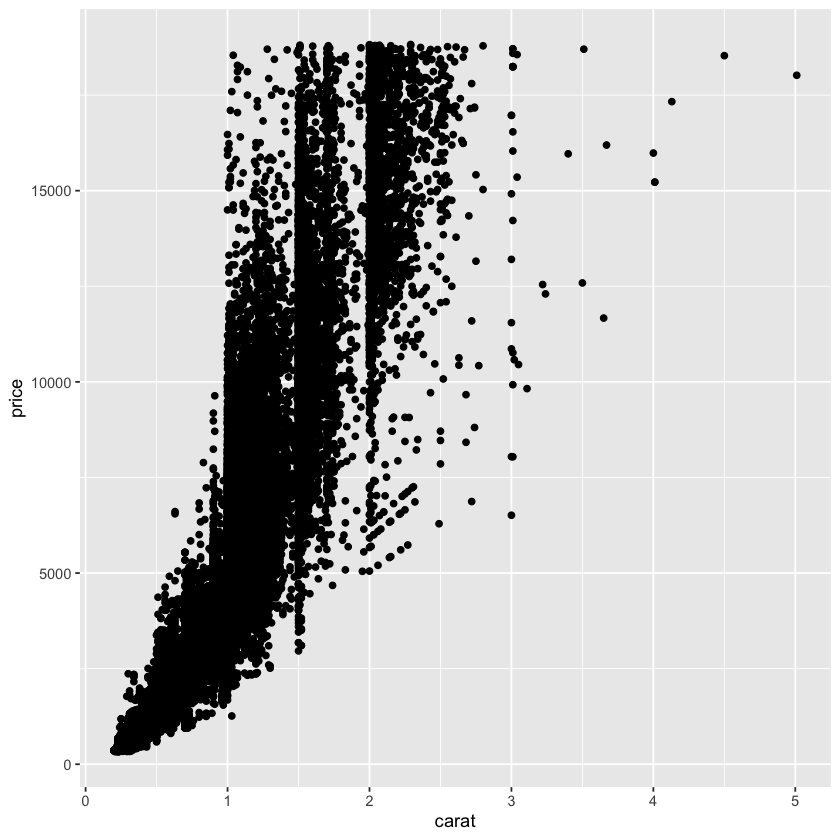

In [3]:
ggplot(data=diamonds, aes(x=carat, y=price)) +  # Initialize plot* 
      geom_point()           # Add a layer of points (make scatterplot)


*Note: To add a new element to a plot, simply place a "+" after the previous element.*

The type of plot you create is determined by the layers you add. In this example, we utilized geom_point(), which plots the data as points at specified x and y coordinates, resulting in a scatterplot. ggplot2 offers a diverse selection of geoms that allow you to create various plot types. Below is a list of geoms for the plot types covered in the previous lesson, along with a few additional ones.

In [4]:
geom_histogram()  # histogram
geom_density()    # density plot
geom_boxplot()    # boxplot
geom_violin()     # violin plot (combination of boxplot and density plot)
geom_bar()        # bar graph
geom_point()      # scatterplot
geom_jitter()     # scatterplot with points randomly perturbed to reduce overlap
geom_line()       # line graph
geom_errorbar()   # Add error bar
geom_smooth()     # Add a best-fit line
geom_abline()     # Add a line with specified slope and intercept

geom_bar: na.rm = FALSE, orientation = NA
stat_bin: binwidth = NULL, bins = NULL, na.rm = FALSE, orientation = NA, pad = FALSE
position_stack 

geom_density: na.rm = FALSE, orientation = NA, outline.type = upper
stat_density: na.rm = FALSE, orientation = NA
position_identity 

geom_boxplot: outlier.colour = NULL, outlier.fill = NULL, outlier.shape = 19, outlier.size = 1.5, outlier.stroke = 0.5, outlier.alpha = NULL, notch = FALSE, notchwidth = 0.5, varwidth = FALSE, na.rm = FALSE, orientation = NA
stat_boxplot: na.rm = FALSE, orientation = NA
position_dodge2 

geom_violin: draw_quantiles = NULL, na.rm = FALSE, orientation = NA
stat_ydensity: trim = TRUE, scale = area, na.rm = FALSE, orientation = NA
position_dodge 

geom_bar: just = 0.5, width = NULL, na.rm = FALSE, orientation = NA
stat_count: width = NULL, na.rm = FALSE, orientation = NA
position_stack 

geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_jitter 

geom_line: na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_identity 

geom_errorbar: na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_identity 

geom_smooth: na.rm = FALSE, orientation = NA, se = TRUE
stat_smooth: na.rm = FALSE, orientation = NA, se = TRUE
position_identity 

mapping: intercept = ~intercept, slope = ~slope 
geom_abline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

The scatterplot created earlier lacks the appealing coloring seen in the qplot(). To incorporate colors based on the "clarity" variable, we could have added an aesthetics mapping while introducing the geom_point() layer.

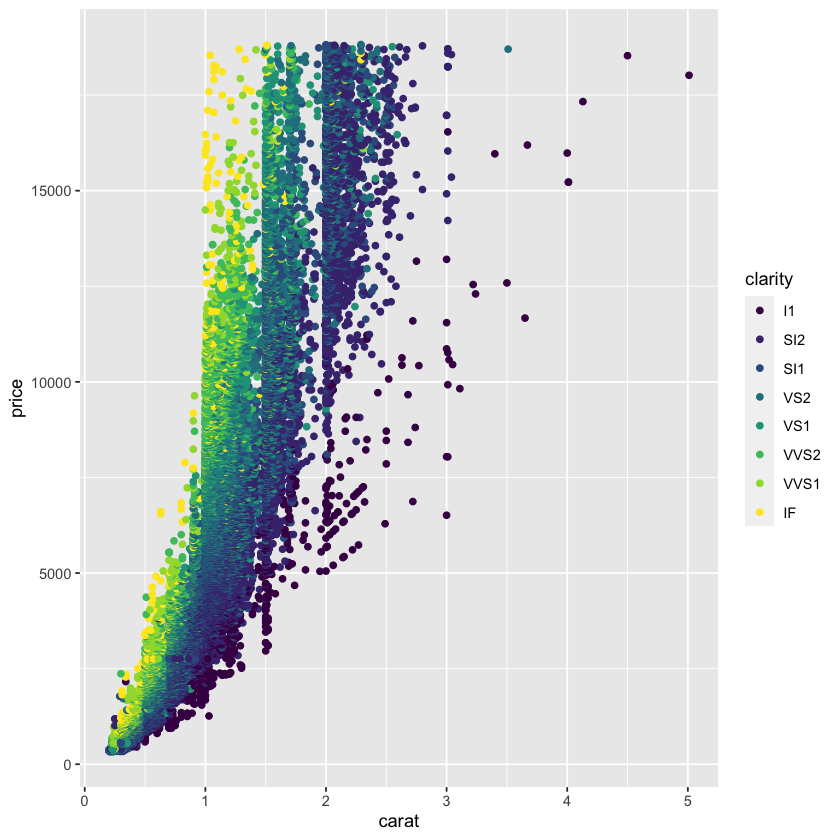

In [5]:
ggplot(data=diamonds, aes(x=carat, y=price)) +  # Initialize plot 
       geom_point(aes(color = clarity))         # Add color based on clarity

Observe the extent of data point overlap. To gain a clearer understanding of overlapping data, consider adjusting the data points' transparency. You can control transparency using the alpha parameter.

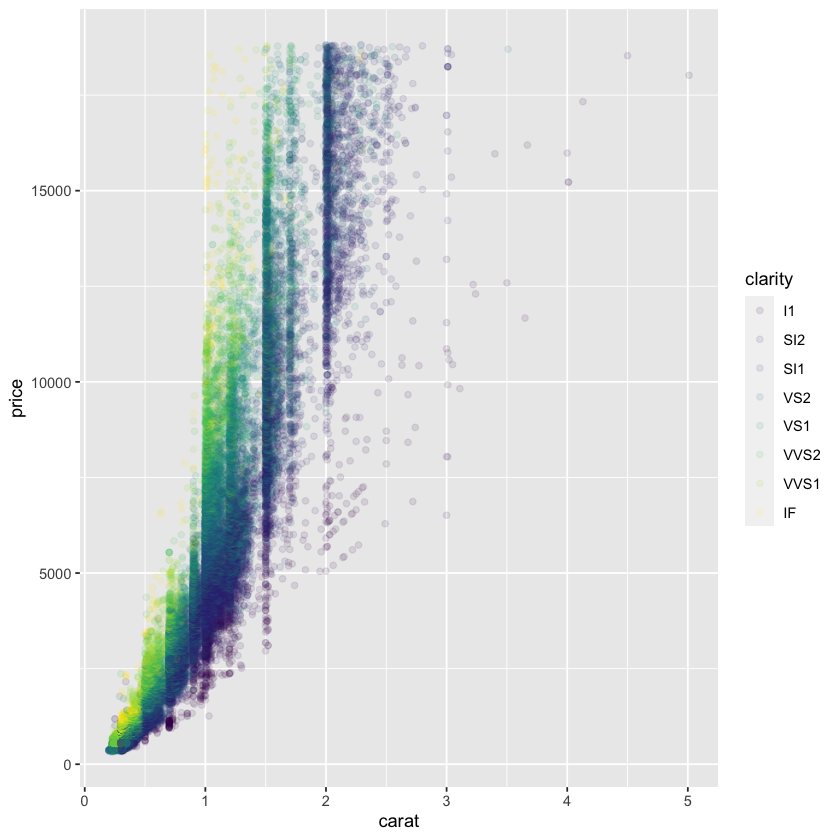

In [6]:
ggplot(data=diamonds, aes(x=carat, y=price)) +          # Initialize plot 
       geom_point(aes(color = clarity), alpha = 0.1)    # Add transparency

*Note: The reason we provide alpha as an argument outside the aes() mapping is that we are assigning a constant value to alpha rather than linking it to a variable.*

By assigning alpha a value of 0.1, we make each data point 90% transparent. This high level of transparency can make individual data points challenging to observe, but it allows us to concentrate on regions with high data density. To further emphasize the areas of higher density, we will narrow down the X-axis range to 2.5 carats.

Warning message:
“Removed 126 rows containing missing values (`geom_point()`).”


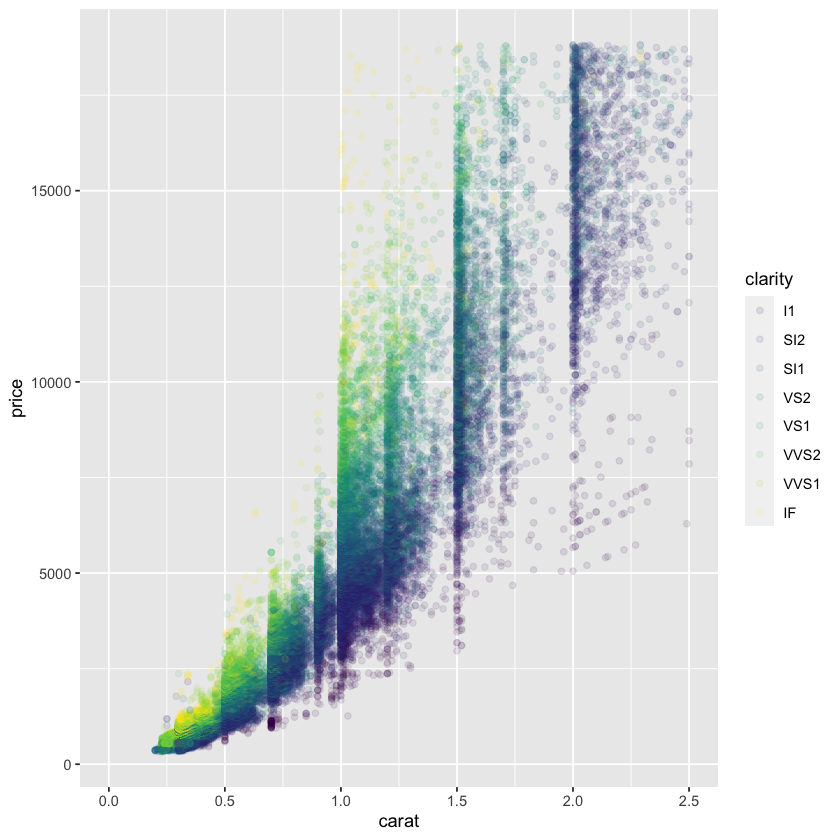

In [7]:

ggplot(data=diamonds, aes(x=carat, y=price)) +  # Initialize plot 
       geom_point(aes(color = clarity), alpha = 0.1)  +  # Add transparency
       xlim(0,2.5)                                       # Specify x-axis range

Please be aware that using xlim and ylim may lead to the removal of data points lying outside the specified plot range, which could trigger warning messages.

# More Plot Examples

Having acquired the fundamentals of creating plots using ggplot(), let's recreate some of the charts we previously made and observe their appearance in ggplot2. We'll begin with a histogram.

Warning message:
“Removed 32 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


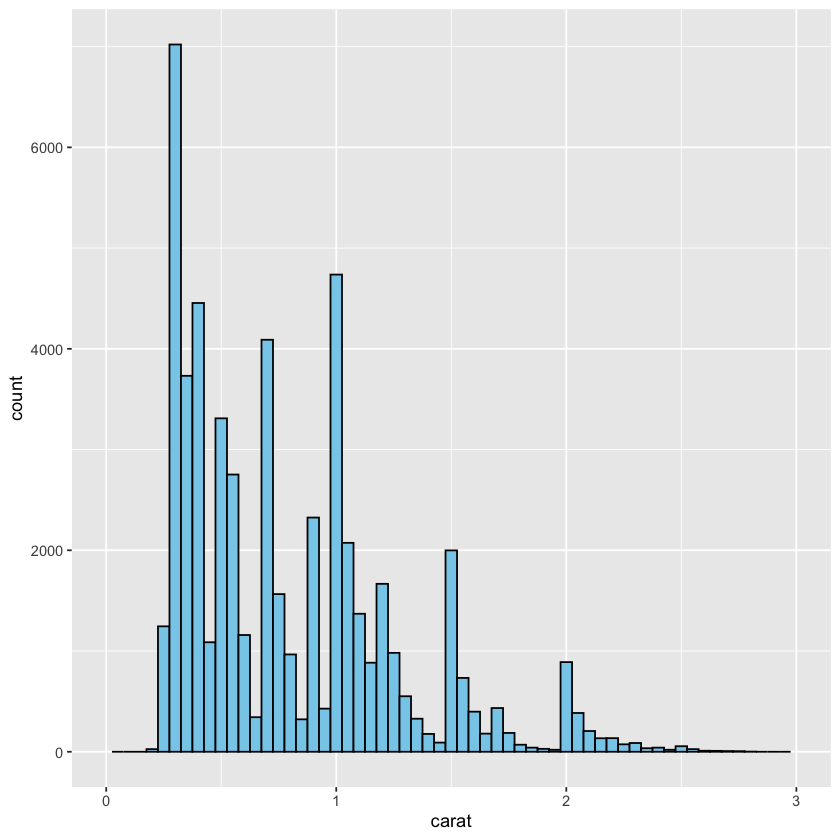

In [8]:
# Create a histogram of carat

ggplot(data=diamonds, aes(x=carat)) +      # Initialize plot 

       geom_histogram(fill="skyblue",      # Create histogram with blue bars
                      col="black",         # Set bar outline color to black
                      binwidth = 0.05) +   # Set bin width

       xlim(0,3)                           # Add x-axis limits

The ggplot2 package offers more aesthetically appealing scales and background compared to the basic plotting functions.

Now, let's create side-by-side boxplots split on clarity with an added twist: incorporating data points as a layer behind the boxplots. To achieve this, we will use geom_jitter(). Similar to geom_point(), geom_jitter() introduces slight random variation (jitter) to space out data points horizontally, reducing overlap. This will result in noticeable thick bands of points at common carat sizes when observing the boxplot.

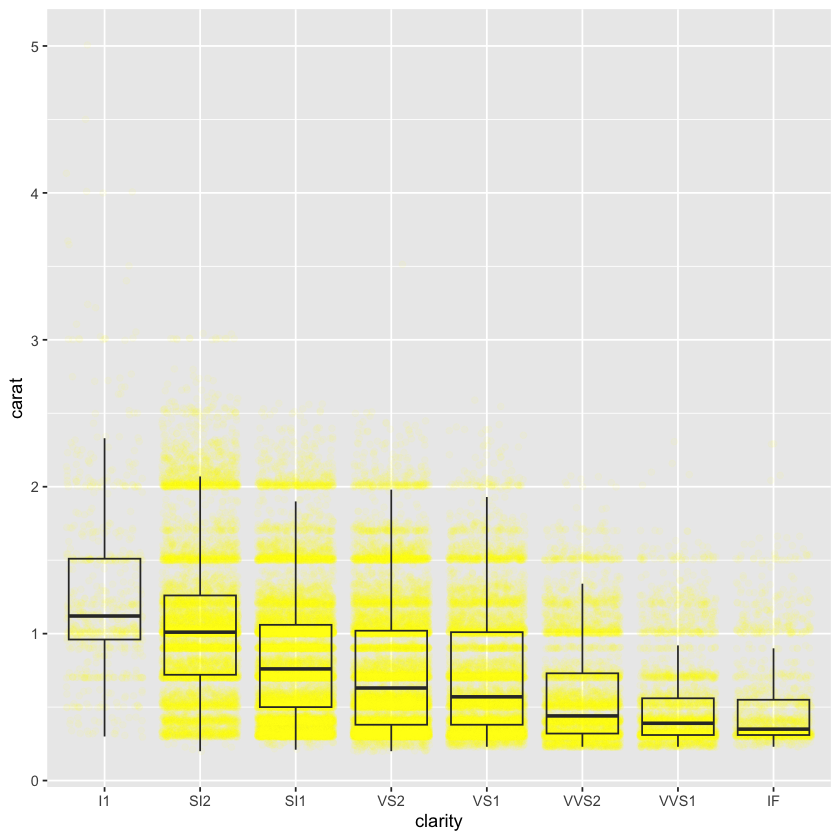

In [9]:
# Create boxplot of carat split on clarity with points added
ggplot(data=diamonds, aes(x=clarity, y=carat)) +  # Initialize plot 

       geom_jitter(alpha=0.05,          # Add jittered data points
                   color="yellow") +    # Set data point color

       geom_boxplot(outlier.shape=1,     # Create boxplot and set outlier shape
                    alpha = 0  )         # Make inner boxplot area transparent

By incorporating jittered data points and overlaying them with the boxplots, we gain a more comprehensive understanding of the distributions compared to using boxplots alone. This visualization reveals distinct clusters of data points at specific carat sizes, such as 1, 1.5, and 2.

Next, let's create a grouped barplot similar to the one we previously generated.

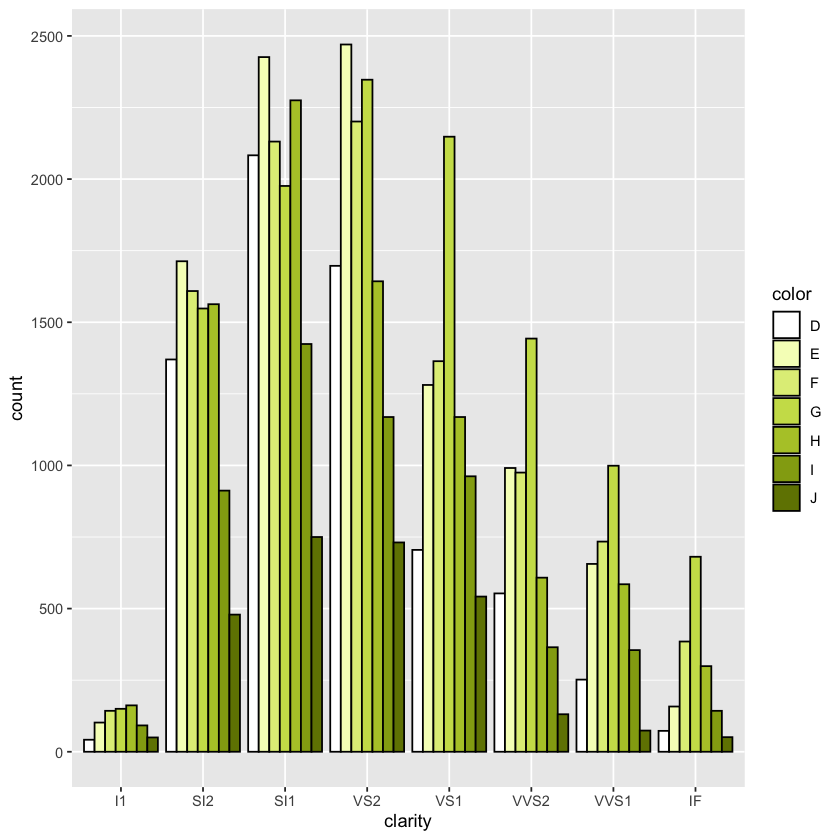

In [10]:
ggplot(data=diamonds, aes(x=clarity)) +        # Initialize plot 

       geom_bar(aes(fill=color),   # Create bar plot, fill based on diamond color
                color="black",                 # Set bar outline color
                position="dodge") +            # Place bars side by side

       scale_fill_manual(values=c("#FFFFFF","#F5FCC2",     # Use custom colors
        "#E0ED87","#CCDE57", "#B3C732","#94A813","#718200"))


While ggplot syntax may require a bit more verbosity compared to base R plotting, it offers the advantage of producing crisper plots with useful gridlines. Additionally, ggplot2's logical and incremental syntax allows for more precise control over your visualizations.

Moving on to our next task, we will create a density plot of carat weight. However, this time, we'll go beyond a simple density curve and generate a stacked density plot that segments the density curve based on the diamond cut.

Warning message:
“Removed 126 rows containing non-finite values (`stat_density()`).”


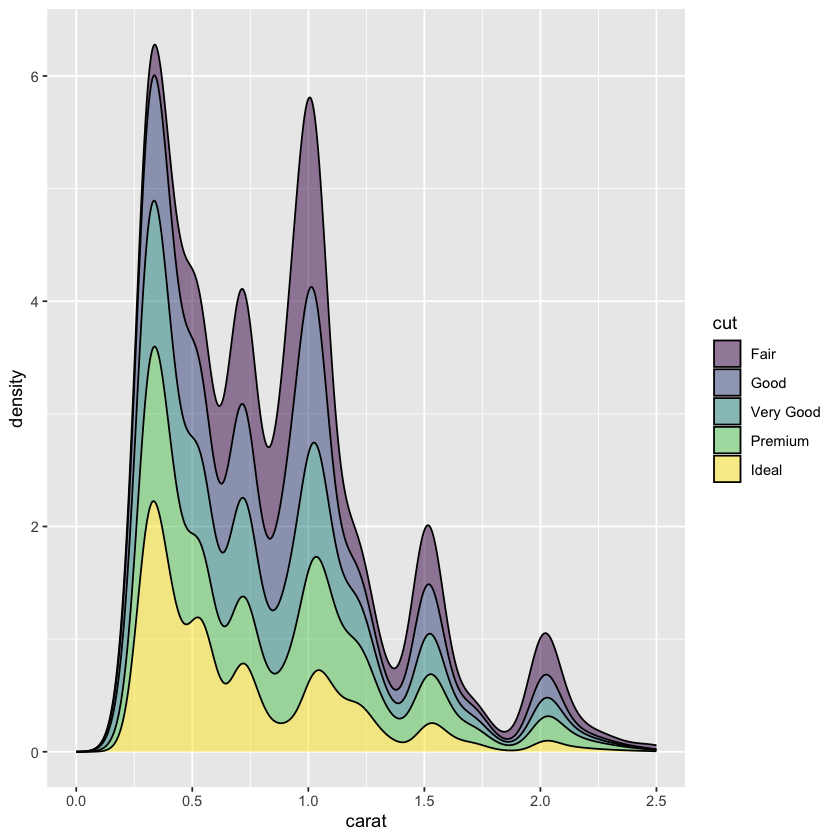

In [11]:

ggplot(data=diamonds, aes(x=carat)) +       # Initialize plot 
        xlim(0,2.5)                 +       # Limit the x-axis*

        geom_density(position="stack",      # Create a stacked density chart
                     aes(fill=cut),         # Fill based on cut
                     alpha = 0.5)           # Set transparency

*Please be aware that when the x-axis is limited, certain values are excluded.*

Stacked density charts may appear somewhat cluttered, but they provide valuable insights into the relationship between diamond cuts and diamond size. From the plot, we observe that ideal cut diamonds are generally smaller, whereas larger diamonds are more likely to have lower cut grades.

Now, we will recreate the line plot using ggplot2, as done in our previous session.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


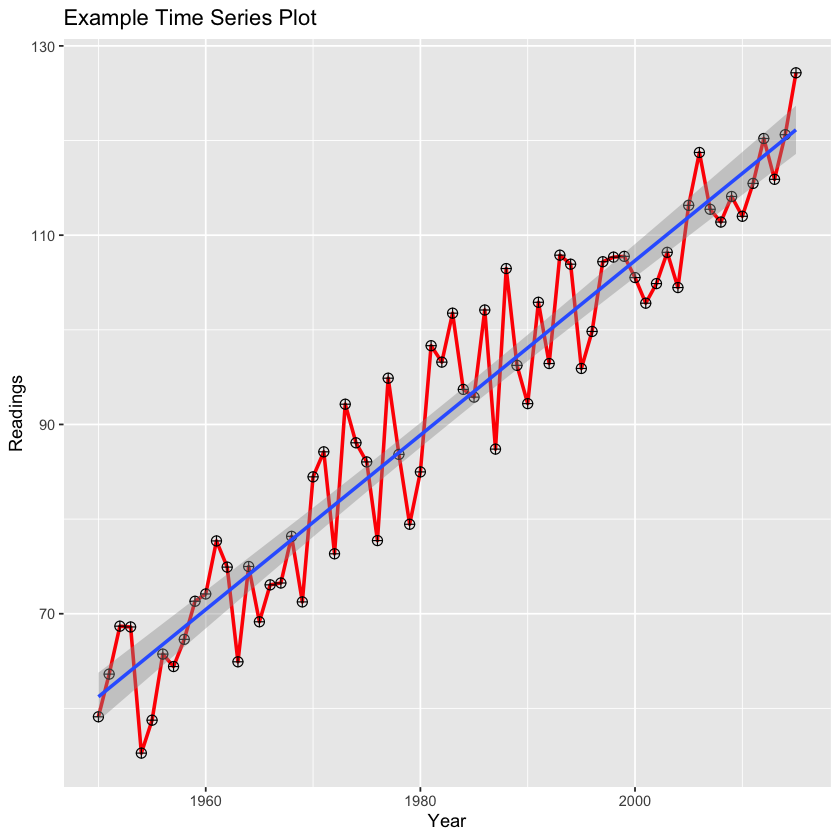

In [12]:
years <- seq(1950,2015,1)                         # Create some dummy data
readings <- (years-1900) + runif(66,0,20)
data <- data.frame(years,readings)


ggplot(data=data, aes(x=years,y=readings)) +       # Initialize plot 

        geom_line(color="red",                     # Draw a line plot
                  size = 1)    +

        geom_point(shape=10,                       # Display the points
                  size=2.5)    +

        geom_smooth(method=lm) +                   # Add a linear best fit line

        xlab("Year") + ylab("Readings") +          # Change axis labels

        ggtitle("Example Time Series Plot")        # Add a title

# Scales


In ggplot2, scales are parameters that define how a plot maps values to visual aesthetics. When no specific scale is specified for an aesthetic, the plot uses a default scale. For instance, the color splits in the plots rely on a default color scale. However, you can customize scales by adding scale elements to your plot, which have the following format: `scale_aesthetic_scaletype()`.

We previously encountered an example of a scale when creating the grouped barplot. In that instance, we manually set the fill color scale for the bars using `scale_fill_manual()`.

Now, let's proceed to create a new scatterplot with multiple aesthetic properties and modify some of the scales.

Warning message:
“Removed 126 rows containing missing values (`geom_point()`).”


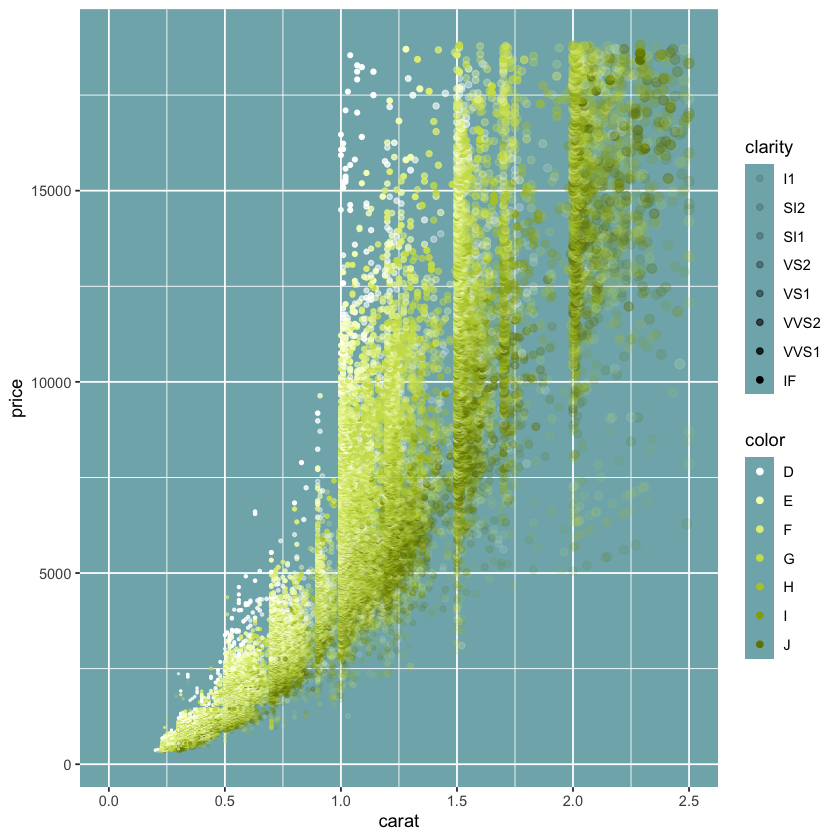

In [13]:
ggplot(data=diamonds, aes(x=carat, y=price)) +  # Initialize plot 
  
  geom_point(aes(size = carat,          # Size points based on carat
                 color = color,         # Color based on diamond color
                 alpha = clarity)) +    # Set transparency based on clarity
                           
  scale_color_manual( values=c("#FFFFFF","#F5FCC2",   # Use manual color values
                               "#E0ED87","#CCDE57", 
                               "#B3C732","#94A813",
                               "#718200")) +
  
  scale_alpha_manual(values = c(0.1,0.15,0.2,         # Use manual alpha values
                                0.3,0.4,0.6,
                                0.8,1)) + 
  
  scale_size_identity() +       # Set size values to the actual values of carat*
  
  xlim(0,2.5) +                 # Limit x-axis
  
  theme(panel.background = element_rect(fill = "#7FB2B8")) +   # Change background color
  
  theme(legend.key = element_rect(fill = '#7FB2B8'))    # Change legend background color



The above plot merely touches on the vast possibilities offered by scales and other plot options. A thorough exploration of all plot options extends beyond the scope of this brief introduction to ggplot2. For a concise summary of common plotting layers and options, you can refer to this ggplot2 [reference sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf).

# Conclusion

The ggplot2 package in R surpasses the capabilities of R's base plotting functions and offers a wide array of advanced features. It has earned a reputation as the go-to tool for creating high-quality plots in R. With ggplot2, charts become more readable due to its improved scaling and axes. Although the syntax may be more verbose, it follows a logical structure that grants you greater control and facilitates the integration of new features into your plots. While base R's plotting functions remain valuable for quick and initial data exploration, ggplot2 shines when you aim to elevate your visualizations to a higher level of sophistication.

# Exercises

To complete the exercises, fill in the code boxes as per the instructions and then execute them.

### Exercise 1
Begin by loading the Titanic training dataset, and then utilize ggplot() to generate a scatterplot showcasing Age against Fare. Make sure to restrict the y-axis to display values within the range of 0 to 100.

In [14]:
titanic_train <- read.csv("../data/titanic/train.csv")
"Your Code Here!"

[1] "Your Code Here!"

### Exercise 2
"First, convert the variable 'Pclass' into a factor. Afterward, recreate the previous plot, this time using color to represent the different levels of the 'Pclass' variable."

In [15]:
"Your Code Here!"

[1] "Your Code Here!"

### Exercise 3
Generate a new plot by incorporating the facet_wrap() function to facet the data based on the Survived variable.

In [16]:
"Your Code Here!"

[1] "Your Code Here!"

## Exercise Solutions

Warning message:
“Removed 225 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 225 rows containing missing values (`geom_point()`).”


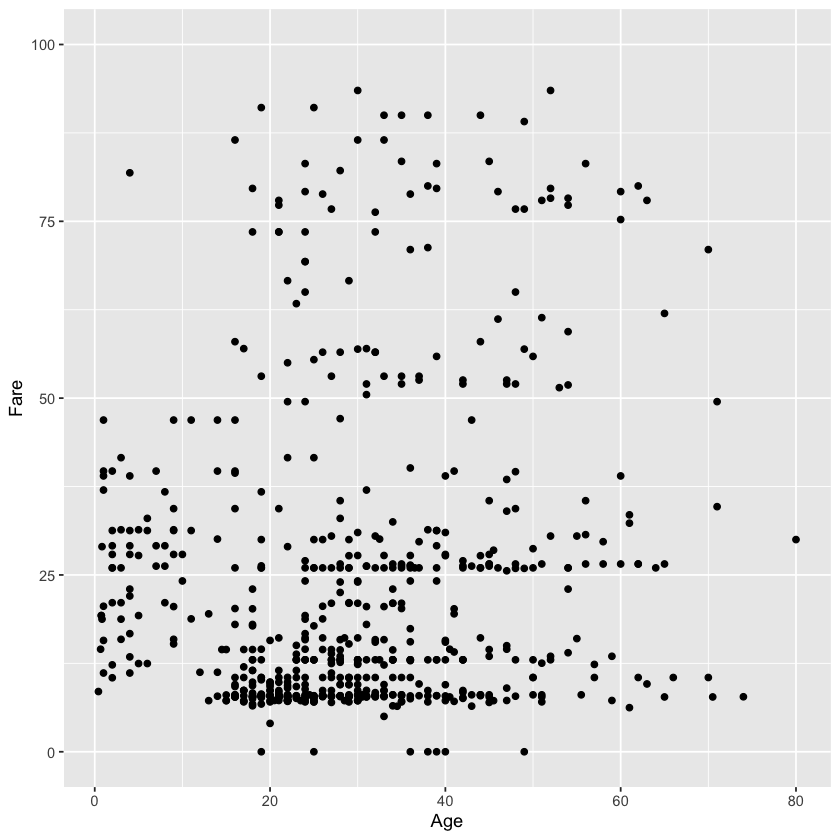

Warning message:
“Removed 225 rows containing missing values (`geom_point()`).”


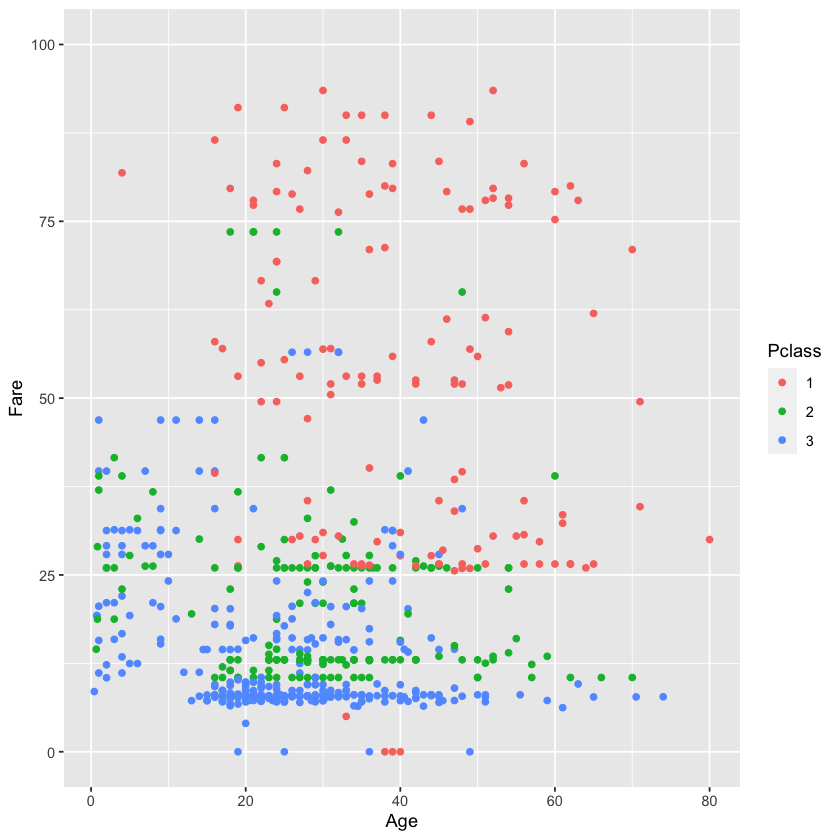

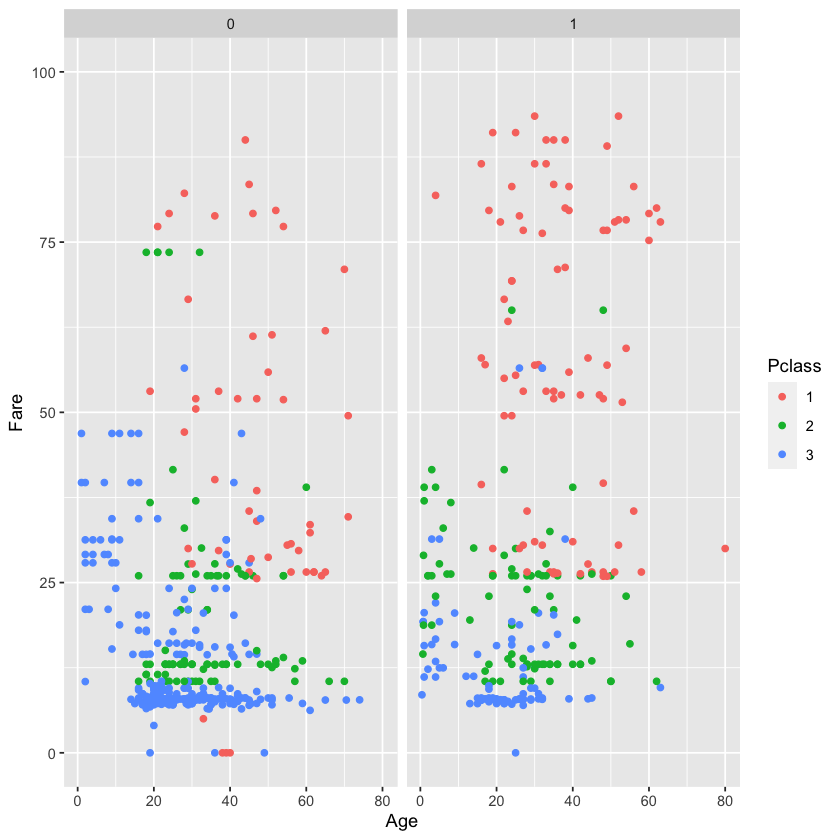

In [17]:
#1

titanic_train <- read.csv("../data/titanic/train.csv")

ggplot(titanic_train, aes(Age, Fare)) + 
                        geom_point() + 
                        ylim(0,100)

#2

titanic_train$Pclass <- factor(titanic_train$Pclass)

ggplot(titanic_train, aes(Age, Fare)) + 
                        geom_point(aes(color=Pclass)) + 
                        ylim(0,100)

#3

ggplot(titanic_train, aes(Age, Fare)) + 
                        geom_point(aes(color=Pclass)) + 
                        ylim(0,100) +
                        facet_wrap(~Survived)